# Setup

Importing things we need, such as pandas (a data analysis and manipulation tool), numpy (a Python package for computing) and scikit-learn (an ML package for Python). Please note scikit-learn is imported using the sklearn identifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# to make this notebook's output stable across runs
np.random.seed(42)

Please check the path to the data file is ok.

In [2]:
input_file = "./MergeConflictsDataset.csv"

Now, we have to read the data from a file (e.g., a csv file) and store it into memory. For this, we can use pandas' read_csv:

In [3]:
data = pd.read_csv(input_file, header = 0, delimiter=';')

Let us see the data we've got:

In [4]:
data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,c52216c411e4d7d9ef7845926f471f49f48b3ea5,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,d7727481e759ef6ac2c285d64c4ebb86666652f9,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26969,8bf4fb99b439379ed99f0a4fc761fa65ca31d8ba,a248acc589a43d7234d383252546b99b27ec32b9,478863dfe34904b9490be64c0d508e0af6b46b2f,ebffde52d50a6c8f9973ec675b8ab17dea5420e1,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26970,a27a50f87f61d871ddb1aeed6993b132fd657ea6,542ff7fe4297d73a39664b468962ab681e4bea91,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26971,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,e6ed8366b6e1e72bc8de97159198c64edab5cd96,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


How many lines and columns do we have?

In [5]:
data.shape

(26973, 37)

Which are the columns of our data?

In [6]:
data.columns

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'conflict'],
      dtype='object')

Let's see a sample of our data: first 5 lines

In [7]:
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


Maybe we want to see the type of each column:

In [8]:
data.dtypes

commit              object
parent1             object
parent2             object
ancestor            object
is pr                int64
added lines          int64
deleted lines        int64
devs parent1         int64
devs parent2         int64
time                 int64
nr files             int64
added files          int64
deleted files        int64
renamed files        int64
copied files         int64
modified files       int64
nr commits1          int64
nr commits2          int64
density1             int64
density2             int64
fix                  int64
bug                  int64
feature              int64
improve              int64
document             int64
refactor             int64
update               int64
add                  int64
remove               int64
use                  int64
delete               int64
change               int64
messages_min         int64
messages_max         int64
messages_mean      float64
messages_median    float64
conflict             int64
d

Now, we want to assign numerical codes to the data at hand. The first option is to assign distinct numbers to each possible value in a column. LabelEncoder can do that. Let's try this for every column in our data.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_1 = data.apply(le.fit_transform)

Let's see what we've got:

In [10]:
data_1

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25206,25994,9899,18212,1,5,0,0,1,23,...,0,0,0,0,0,20,64,451,33,0
1,4283,11968,26283,11668,0,970,1111,1,2,371,...,0,0,0,0,0,31,116,1732,100,1
2,24358,5698,19606,3951,1,0,0,0,1,22,...,0,0,0,0,0,18,17,71,29,0
3,1270,6896,14036,18400,1,0,0,2,1,24,...,0,0,0,0,0,22,62,582,55,0
4,7008,12515,9845,2600,0,0,0,1,2,2,...,0,0,0,0,0,31,55,770,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,20769,9780,22531,6834,1,66,0,0,1,184,...,0,0,0,0,0,19,18,77,31,0
26969,14869,16788,7494,17026,1,1,1,2,1,736,...,0,0,0,0,0,30,33,384,61,0
26970,17164,8839,23185,6131,1,1,1,0,1,22,...,0,0,0,0,0,8,57,378,59,0
26971,23388,8839,24104,6131,1,1,1,0,1,11,...,0,0,0,0,0,8,7,13,9,0


First, we grab the values of all attributes: based upon them, we will predict the value of the target (the label).

In [11]:
X = data_1[data.columns.drop('conflict')]

What do we have in the attribute part of our data?

In [12]:
X

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
0,25206,25994,9899,18212,1,5,0,0,1,23,...,3,0,0,0,0,0,20,64,451,33
1,4283,11968,26283,11668,0,970,1111,1,2,371,...,1,0,0,0,0,0,31,116,1732,100
2,24358,5698,19606,3951,1,0,0,0,1,22,...,0,0,0,0,0,0,18,17,71,29
3,1270,6896,14036,18400,1,0,0,2,1,24,...,0,0,0,0,0,0,22,62,582,55
4,7008,12515,9845,2600,0,0,0,1,2,2,...,0,0,0,0,0,0,31,55,770,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,20769,9780,22531,6834,1,66,0,0,1,184,...,0,0,0,0,0,0,19,18,77,31
26969,14869,16788,7494,17026,1,1,1,2,1,736,...,4,0,0,0,0,0,30,33,384,61
26970,17164,8839,23185,6131,1,1,1,0,1,22,...,0,0,0,0,0,0,8,57,378,59
26971,23388,8839,24104,6131,1,1,1,0,1,11,...,0,0,0,0,0,0,8,7,13,9


Then, we select the array containing the labels (the values we want to predict for each example).

In [13]:
y = data_1['conflict']

Which are the labels corresponding to each example?

In [14]:
y

0        0
1        1
2        0
3        0
4        1
        ..
26968    0
26969    0
26970    0
26971    0
26972    0
Name: conflict, Length: 26973, dtype: int64

# Model

Let's build the classifier (model) in form of a random forest in order to minimize overfitting.

Split dataset

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# do another split

In [16]:
X_train

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
18967,11390,8703,19064,6032,1,2,1,0,1,51,...,1,0,0,0,0,0,51,50,1222,95
3202,12295,12234,21036,50,0,272,13,6,1,172,...,2,16,3,2,1,2,42,135,4651,163
22141,19836,24427,25788,4515,1,33,15,10,1,69,...,2,5,1,3,0,0,69,171,7502,209
26334,16700,832,26247,2658,1,20,3,5,1,103,...,2,2,0,0,0,2,165,281,8939,409
12181,11913,13150,5209,10733,1,6,0,3,1,7,...,1,0,0,0,0,0,124,170,8502,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,26896,6452,1966,15441,1,10,0,1,1,4,...,1,1,0,0,0,1,111,127,7778,233
5390,10466,7513,17572,15976,1,186,132,2,1,96,...,0,0,0,1,0,1,94,98,5946,186
860,22483,10306,16761,9919,1,15,15,2,1,107,...,4,0,0,0,0,0,36,68,938,79
15795,19236,7419,8316,17378,1,82,0,6,1,212,...,1,2,1,6,0,1,23,77,1132,95


In [17]:
y_train

18967    0
3202     0
22141    0
26334    0
12181    0
        ..
21575    0
5390     0
860      0
15795    0
23654    0
Name: conflict, Length: 20229, dtype: int64

Let's scale the data, while preventing data leakage:

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now let's build and train the model:

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

You may want to take a look at it, so you can save it as a pdf file. Only one tree from the random forest is saved. It is also showed in this notebook.

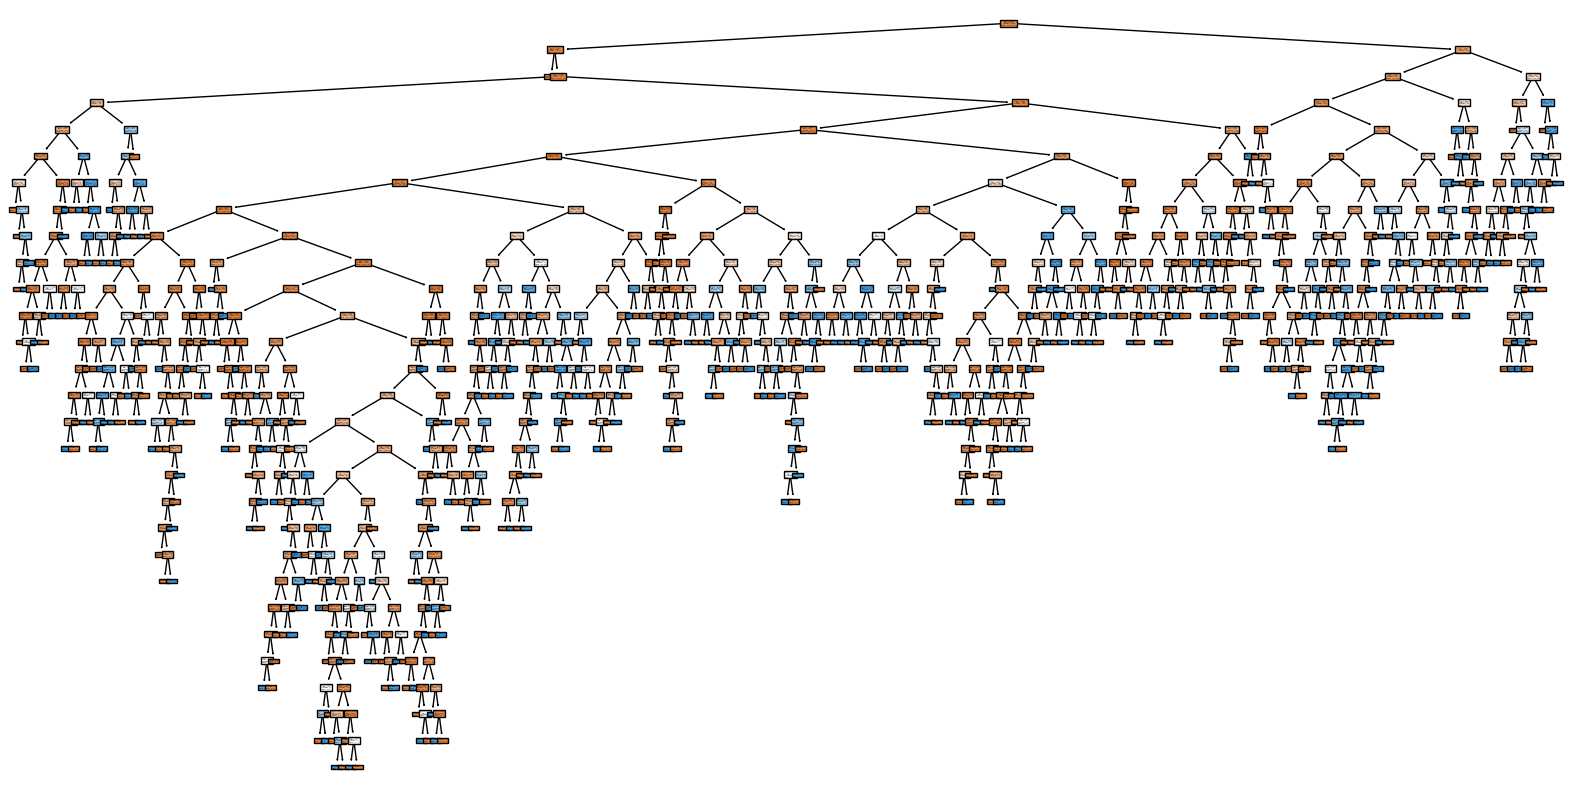

In [20]:
from sklearn.tree import plot_tree

# This block takes some time to complete. Please be patient!

plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], filled=True)
plt.savefig('random_forest.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

# Metrics

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = rf.predict(X_test) # generate predictions for the test dataset

confusion_matrix(y_test, y_pred)

array([[6300,   61],
       [ 168,  215]])

In [22]:
accuracy_score(y_test, y_pred)

0.9660438908659549

In [23]:
precision_score(y_test, y_pred)

0.7789855072463768

In [24]:
recall_score(y_test, y_pred)

0.5613577023498695

In [25]:
f1_score(y_test, y_pred)

0.6525037936267071

In [26]:
roc_auc_score(y_test, y_pred)

0.7758840075968809